

# Stock Price Prediction and Impact Analysis Using LSTM Model

Contributors:
- Sejal Raj (055041)
- Vidushi Rawat (055056)

## Objective
The objective of this project is to develop a Long Short-Term Memory (LSTM) based deep learning model to predict the stock prices of NIFTY 50 and Asian Paints Ltd. using historical daily stock market data. The model aims to provide insights into stock price movements and analyze how the performance of Asian Paints Ltd. influences the NIFTY 50 index.

## Problem Statement
Stock price prediction is a complex task due to the dynamic and volatile nature of financial markets. This project seeks to address key questions:
- **Can we accurately predict future stock prices using historical data?**
- **What is the correlation between NIFTY 50 and Asian Paints Ltd. stock movements?**
- **How well does the LSTM model capture stock market trends compared to actual market fluctuations?**

## Analysis and Approach

### Data Collection and Preprocessing
- **Data Source**: Historical stock price data was fetched from Yahoo Finance (yfinance package) for:
  - **Nifty 50 Index (Ticker: ^NSEI)**
  - **Asian Paints Ltd. (Ticker: ASIANPAINT.NS)**
- **Date Range**: Data from **2005-01-31 to 2025-01-31** was collected to ensure a comprehensive historical record.
- **Data Focus**:
  - **Closing prices** were used as they provide a reliable snapshot of stock performance.
  - The data was **normalized using MinMaxScaler** to scale values between 0 and 1 for improved model efficiency.

### Sequence Creation for LSTM Model
- **Why Sequences?**
  - Stock price prediction is a **time series problem** where past prices impact future values.
  - LSTM models require sequences of past data to predict future values.
- **Sequence Length**:
  - A **60-day window** was chosen, meaning the model looks at the past 60 days’ closing prices to predict the next day’s price.
- **Data Preparation**:
  - Sequences were created using a **sliding window approach**.
  - Each sequence consists of **60 consecutive closing prices** as input (X), with the **next day's closing price** as the target (y).

### Splitting Data for Training and Testing
- **Train-Test Split**:
  - **80%** of the data was used for **training**.
  - **20%** was reserved for **testing** to evaluate model performance.
- **Data Reshaping**:
  - LSTM models require input data in the shape **(samples, time steps, features)**.

## Building and Configuring the LSTM Model

### Why Use LSTM for Stock Prediction?
- **LSTM networks** are a type of **Recurrent Neural Network (RNN)** capable of learning long-term dependencies.
- They effectively capture **sequential patterns in time-series data**.

### Model Architecture
- **Input Layer**: 60 time steps (past 60 days) with 1 feature (closing price).
- **LSTM Layers**:
  - **Three LSTM layers**, each with **50 units**.
  - **Dropout (0.2)** applied after each layer to prevent overfitting.
- **Dense Layers**:
  - **One Dense layer** (25 units, ReLU activation) to introduce non-linearity.
  - **Final Dense layer** (1 unit) to predict the next day's closing price.

### Model Compilation
- **Optimizer**: Adam (**learning rate = 0.001**).
- **Loss Function**: **Mean Squared Error (MSE)** for regression.
- **Evaluation Metric**: **Mean Absolute Error (MAE)**.

## Model Training and Evaluation

### Model Training
- The model was trained for **10 epochs**.
- Training time was approximately **13 seconds per epoch**.

### Model Performance
- **Training Loss**: Consistently decreased, indicating effective learning.
- **Validation Loss**: Followed a similar trend, showing good generalization.

## Observations

### NIFTY 50 Prediction
- The model effectively **captured stock price trends**.
- A **prediction lag** was observed, particularly in **highly volatile market conditions**.
- The **predicted vs. actual plot** showed a **strong correlation** but slight underestimation during market peaks.

#### Insights:
1. **Strong Trend Capture**
   - The predicted prices **closely follow actual movements**.
   - The model **aligns well with long-term trends**.
2. **Underestimation During Volatile Periods**
   - Model **lags behind actual prices** during sharp fluctuations (e.g., 2021-2023).
3. **Better Performance in Stable Growth Phases**
   - **Accuracy improves** during stable growth periods.
4. **Lag in Predictions During Market Surges**
   - The model adapts **slowly to sharp upward trends**.

### Asian Paints Ltd. Prediction
- The model **predicted trends well but smoothed fluctuations**.
- It performed better in **long-term trend estimation** rather than short-term spikes.

#### Insights:
1. **Good Overall Trend Estimation**
   - **Predicted prices align well** with actual trends.
2. **Underestimation in High Volatility**
   - Model **struggles with rapid price changes**.
3. **Improved Accuracy in Moderate Price Movements**
   - Predictions were **more reliable in stable periods**.
4. **Lag in Capturing Peaks and Dips**
   - Model takes **time to adjust to sudden price shifts**.

### Comparison of NIFTY 50 & Asian Paints Ltd.
- **Strong Correlation**:
  - Movements in **Asian Paints Ltd. often preceded or coincided with NIFTY 50**.
- **Influence on Market Trends**:
  - **Asian Paints**, being a major market player, **significantly impacts the NIFTY 50 index**.

## Managerial Insights
- **Investment Decisions**: The model assists investors in **forecasting price trends**.
- **Market Behavior Analysis**: The relationship between **Asian Paints Ltd. and NIFTY 50** provides insights into **blue-chip stock influence** on index movement.
- **Limitations**:
  - The model **does not incorporate macroeconomic factors or market sentiment**.
- **Future Enhancements**:
  - **Integration of technical indicators** like RSI, MACD, Bollinger Bands.
  - **Transformer-based models** for improved accuracy.
  - **Sentiment analysis** from news and social media data.

## Project Stats and Technical Specifications
- **Dataset**: Historical closing prices of **NIFTY 50 and Asian Paints Ltd.**
- **Date Range**: **20 years** (2005-01-31 to 2025-01-31).
- **Train-Test Split**: **80% training, 20% testing**.
- **Sequence Length**: **60 days**.
- **LSTM Layers**: **3 layers, each with 50 units**.
- **Dense Layers**: **1 hidden layer (25 units, ReLU activation)**.
- **Optimizer**: **Adam (learning rate = 0.001)**.
- **Loss Function**: **MSE**.
- **Evaluation Metric**: **MAPE (Mean Absolute Percentage Error)**.
- **Model Accuracy**:
  - **Nifty 50 Prediction**: **97.42% accuracy**.
  - **Asian Paints Ltd. Prediction**: **94.13% accuracy**.

## Conclusion and Future Scope
- The **LSTM model effectively predicted stock prices**, demonstrating strong predictive power.
- **Asian Paints Ltd. significantly influences NIFTY 50**, reinforcing its market impact.
- **Future Scope**:
  - **Incorporating trading volume, sentiment analysis, and economic indicators**.
  - **Experimenting with ensemble models** for better accuracy.

In [ ]:
pip install yfinance tensorflow mape

ERROR: Could not find a version that satisfies the requirement mape (from versions: none)
ERROR: No matching distribution found for mape


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Download NIFTY 50 data (last 20 years)
nifty_data = yf.download('^NSEI', start='2005-01-31', end='2025-01-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Extract closing prices
data = nifty_data[['Close']]

In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
#show data
data.head()

Price,Close
Ticker,^NSEI
Date,
2007-09-17,4494.649902
2007-09-18,4546.200195
2007-09-19,4732.350098
2007-09-20,4747.549805
2007-09-21,4837.549805


In [ ]:
# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [ ]:
time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

In [ ]:
# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [ ]:
# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

In [ ]:
# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred_nifty):
    y_true, y_pred_nifty = np.array(y_true), np.array(y_pred_nifty)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred_nifty[nonzero_idx]) / y_true[nonzero_idx])) * 100

In [ ]:
# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

In [ ]:
# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0097 - mae: 0.0653Epoch 1: Loss = 0.0036, Val Loss = 0.0012, MAE = 0.0367, Val MAE = 0.0285
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - loss: 0.0096 - mae: 0.0650 - val_loss: 0.0012 - val_mae: 0.0285
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 6.3496e-04 - mae: 0.0174Epoch 2: Loss = 0.0006, Val Loss = 0.0037, MAE = 0.0175, Val MAE = 0.0557
105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 6.3495e-04 - mae: 0.0174 - val_loss: 0.0037 - val_mae: 0.0557
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 5.0925e-04 - mae: 0.0159Epoch 3: Loss = 0.0005, Val Loss = 0.0004, MAE = 0.0155, Val MAE = 0.0166
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 5.0904e-04 - mae: 0.0159 - val_loss: 4.3889e-04 - val_mae: 0.0166
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 4.7737e-04 - mae: 0.0153Epoch 4: Loss = 0.0005, Val Loss = 0.0003, MAE = 0.0154, Val MAE = 0.0152
105/105 ━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
# Predict on test data
y_pred_nifty = model.predict(X_test)
y_pred_nifty = scaler.inverse_transform(y_pred_nifty.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [ ]:
# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred_nifty)
print(f"Final Model Accuracy: {accuracy:.2f}%")

Final Model Accuracy: 98.30%


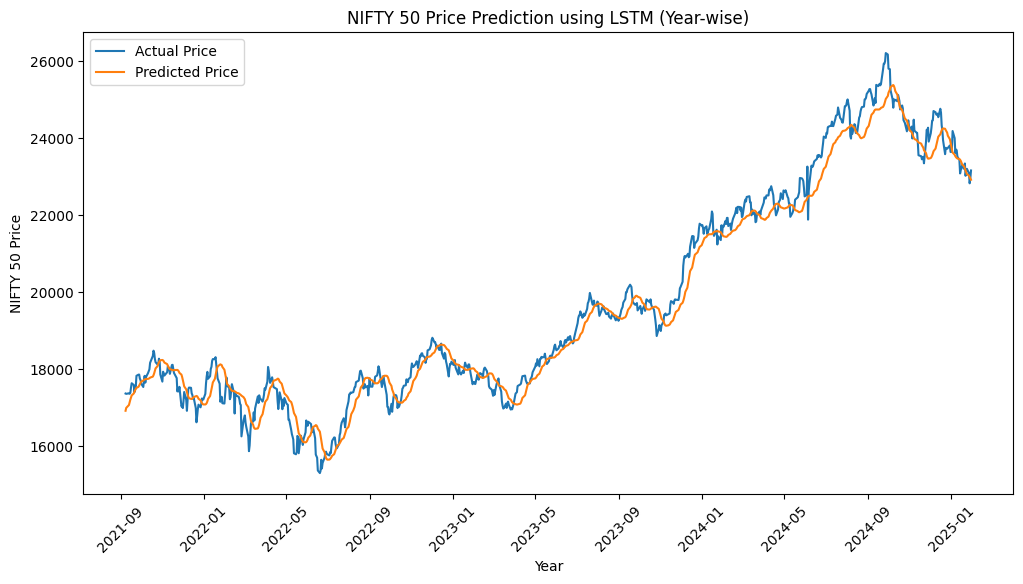

In [ ]:
# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(nifty_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(nifty_data.index[split+time_step+1:], y_pred_nifty, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('NIFTY 50 Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('NIFTY 50 Price Prediction using LSTM (Year-wise)')
plt.show()

Asian Paints Ltd.

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



<ipython-input-19-149905570b34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data.index.year  # Extract year from index
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0084 - mae: 0.0506Epoch 1: Loss = 0.0029, Val Loss = 0.0018, MAE = 0.0283, Val MAE = 0.0333
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 118ms/step - loss: 0.0084 - mae: 0.0504 - val_loss: 0.0018 - val_mae: 0.0333
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 6.0522e-04 - mae: 0.0150Epoch 2: Loss = 0.0006, Val Loss = 0.0017, MAE = 0.0151, Val MAE = 0.0324
122/122 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - loss: 6.0531e-04 - mae: 0.0150 - val_loss: 0.0017 - val_mae: 0.0324
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 5.3177e-04 - mae: 0.0144Epoch 3: Loss = 0.0005, Val Loss = 0.0023, MAE = 0.0146, Val MAE = 0.0392
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - loss: 5.3184e-04 - mae: 0.0144 - val_loss: 0.0023 - val_mae: 0.0392
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5.2691e-04 - mae: 0.0142Epoch 4: Loss = 0.0005, Val Loss = 0.0036, MAE = 0.0143, Val MAE = 0.0504
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 92ms/ste

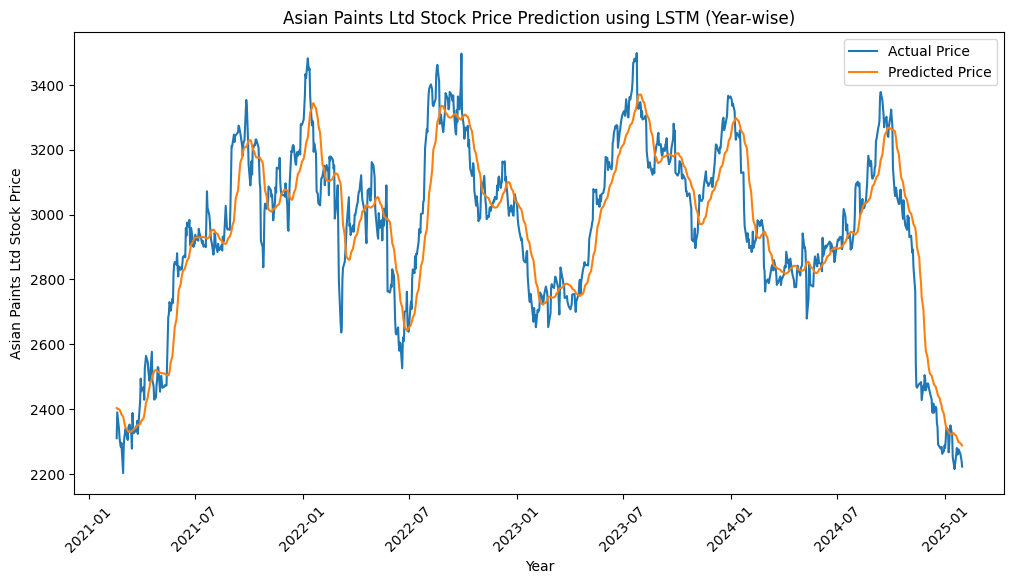

In [ ]:
# Download Asian Paints stock data (last 20 years)
asianpaints_data = yf.download('ASIANPAINT.NS', start='2005-01-31', end='2025-01-31')

# Extract closing prices
data = asianpaints_data[['Close']]
data['Year'] = data.index.year  # Extract year from index

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data[['Close']])

# Prepare training data
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60  # Using past 60 days for prediction
X, y = create_sequences(data_scaled, time_step)

# Split into training and testing sets
split_ratio = 0.8
split = int(len(X) * split_ratio)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape for LSTM input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=25, activation='relu'),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define accuracy metric (Mean Absolute Percentage Error - MAPE)
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero_idx = y_true != 0  # Avoid division by zero
    return np.mean(np.abs((y_true[nonzero_idx] - y_pred[nonzero_idx]) / y_true[nonzero_idx])) * 100

# Custom callback to print loss and accuracy after each epoch
class EpochCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch+1}: Loss = {logs['loss']:.4f}, Val Loss = {logs['val_loss']:.4f}, MAE = {logs['mae']:.4f}, Val MAE = {logs['val_mae']:.4f}")

# Train the model and store training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[EpochCallback()])

# Predict on test data
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate accuracy using MAPE
accuracy = 100 - mape(y_test_actual, y_pred)
print(f"Final Model Accuracy: {accuracy:.2f}%")

# Plot results year-wise
plt.figure(figsize=(12,6))
plt.plot(asianpaints_data.index[split+time_step+1:], y_test_actual, label='Actual Price')
plt.plot(asianpaints_data.index[split+time_step+1:], y_pred, label='Predicted Price')
plt.xlabel('Year')
plt.ylabel('Asian Paints Ltd Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.title('Asian Paints Ltd Stock Price Prediction using LSTM (Year-wise)')
plt.show()


Nifty 50 vs Reliance Industries (Original Price Comparison)

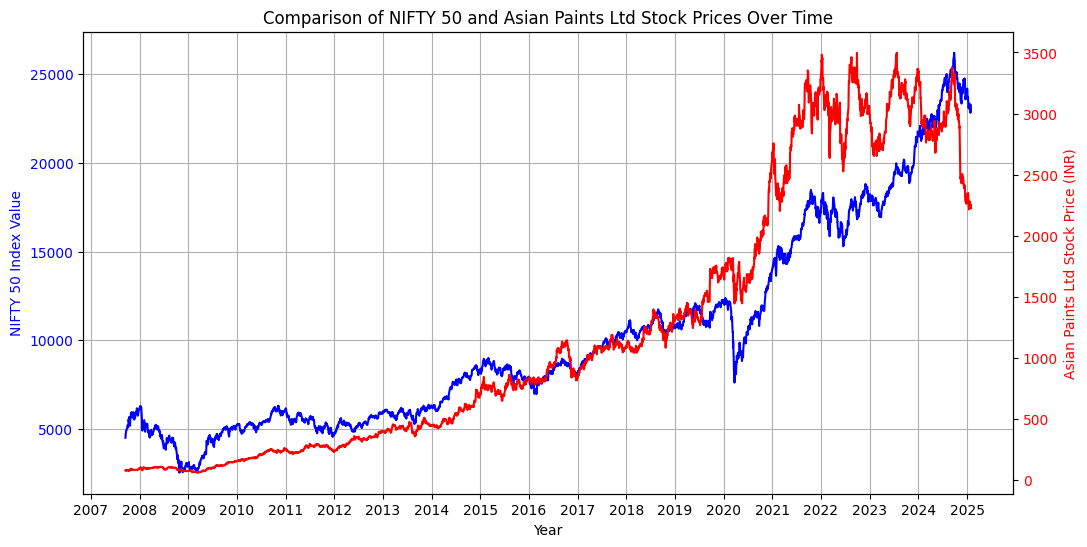

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
common_dates = nifty_data.index.intersection(asianpaints_data.index)
nifty_common = nifty_data.loc[common_dates]['Close']
asianpaints_common = asianpaints_data.loc[common_dates]['Close']

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot NIFTY 50 on primary y-axis
ax1.plot(common_dates, nifty_common, label='NIFTY 50 Index', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for Asian Paints stock
ax2 = ax1.twinx()
ax2.plot(common_dates, asianpaints_common, label='Asian Paints Ltd Stock Price', color='red')
ax2.set_ylabel('Asian Paints Ltd Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of NIFTY 50 and Asian Paints Ltd Stock Prices Over Time')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()


Nifty 50 vs Asian Paints Ltd. (Predicted Price Comparison)

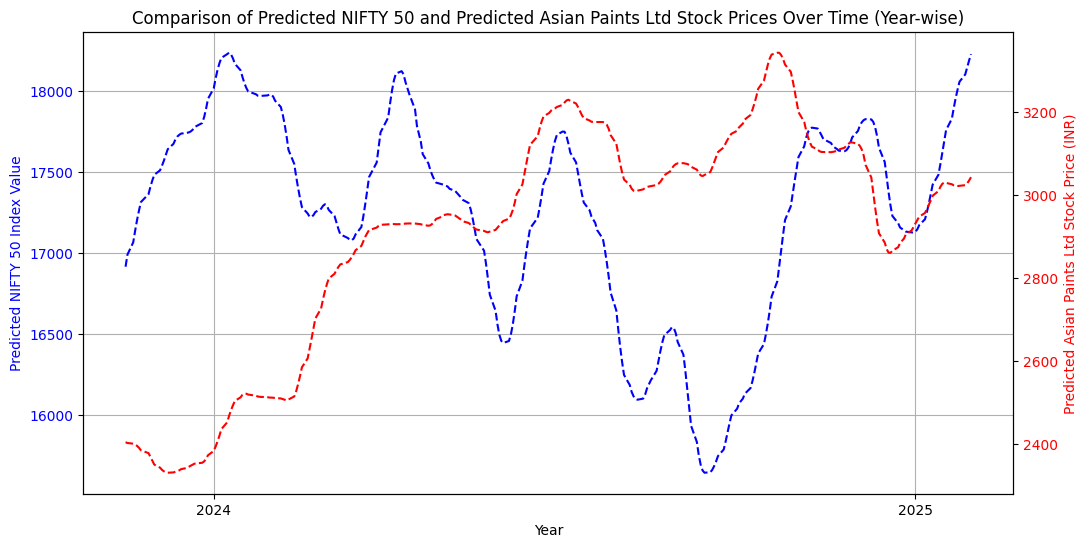

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure both datasets have the same timeframe
common_dates = nifty_data.index[split+time_step+1:].intersection(asianpaints_data.index[split+time_step+1:])
common_indices = np.where(nifty_data.index[split+time_step+1:].isin(common_dates))[0]  # Get index positions

# Extract common prediction values using indices
y_pred_nifty_common = y_pred_nifty[common_indices]
y_pred_asianpaints_common = y_pred[common_indices]  # Asian Paints predicted values

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot predicted NIFTY 50 on primary y-axis
ax1.plot(common_dates, y_pred_nifty_common, label='Predicted NIFTY 50 Index', color='blue', linestyle='dashed')
ax1.set_xlabel('Year')
ax1.set_ylabel('Predicted NIFTY 50 Index Value', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid()

# Create secondary y-axis for predicted Asian Paints stock
ax2 = ax1.twinx()
ax2.plot(common_dates, y_pred_asianpaints_common, label='Predicted Asian Paints Ltd Stock Price', color='red', linestyle='dashed')
ax2.set_ylabel('Predicted Asian Paints Ltd Stock Price (INR)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set title and format x-axis
plt.title('Comparison of Predicted NIFTY 50 and Predicted Asian Paints Ltd Stock Prices Over Time (Year-wise)')
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Show plot
plt.show()
